In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [2]:
#Import the data and remove rows containing NAN values
df = pd.read_excel(r"C:\Users\user\Desktop\project\BOBLSTM\bobdata.xlsx")
df = df.dropna()
df.head()


,Date,Price,Open,High,Low,Volume,Change(%)
0,2019-05-08,110.95,112.60,113.85,110.25,17253993,-0.0142
1,2019-05-09,111.35,111.15,112.65,109.90,15181417,0.0036
2,2019-05-10,113.65,112.30,114.95,110.75,16554916,0.0207
3,2019-05-13,105.80,113.20,113.45,104.80,22850959,-0.0691
4,2019-05-14,109.80,106.80,110.85,104.25,24673541,0.0378


In [3]:
df.tail()

,Date,Price,Open,High,Low,Volume,Change(%)
1235,2024-04-30,281.50,273.35,284.80,272.60,39453521,0.0326
1236,2024-05-02,279.40,281.45,283.90,279.00,12366464,-0.0075
1237,2024-05-03,275.75,282.25,282.50,274.25,19568548,-0.0131
1238,2024-05-06,265.70,276.00,276.00,259.70,34253148,-0.0364
1239,2024-05-07,259.05,266.60,268.35,257.80,17373412,-0.0250


In [4]:
df_Price = df['Price']

In [5]:
df_Price.shape

(1240,)

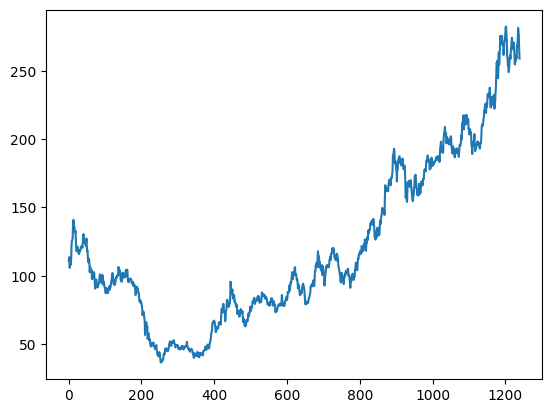

In [6]:
plt.plot(df_Price)

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
df_Price1 = scaler.fit_transform(np.array(df_Price).reshape(-1,1))

In [8]:
df_Price1.shape

(1240, 1)

In [9]:
df_Price1

array([[0.30258078],
       [0.30420646],
       [0.31355416],
       ...,
       [0.97236334],
       [0.93151798],
       [0.90449096]])

In [10]:
#Split the data into train and test split
training_size = int(len(df_Price1) * 0.75)
test_size = len(df_Price1) - training_size
train_data, test_data = df_Price1[0:training_size,:], df_Price1[training_size:len(df_Price1),:1]

In [11]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


In [12]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [13]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [14]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Clear Keras session
K.clear_session()

# Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 400ms/step - loss: 0.0381 - val_loss: 0.1066
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - loss: 0.0014 - val_loss: 0.0129
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - loss: 8.8794e-04 - val_loss: 0.0019
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - loss: 9.3652e-04 - val_loss: 0.0025
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 8.9318e-04 - val_loss: 0.0019
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - loss: 8.0946e-04 - val_loss: 0.0018
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - loss: 8.2708e-04 - val_loss: 0.0017
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - loss: 7.1947e-04 - val_loss: 0.0016
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - loss: 7.4366e-04 - val_loss: 0.0016
Epoch 12/100

In [17]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [18]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [19]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

94.85256867997693

In [20]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

220.05431299416753

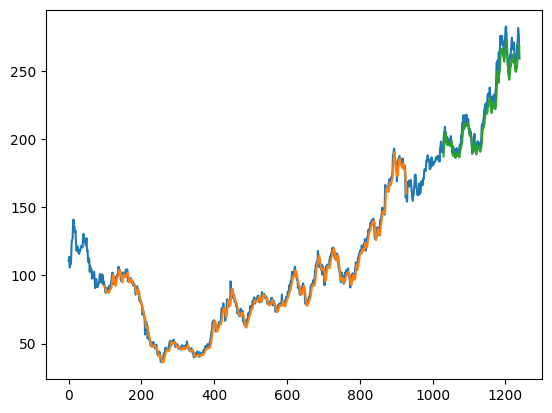

In [21]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_Price1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_Price1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_Price1) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_Price1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
#Predict the next 30 days Stock Price

In [23]:
len(test_data), x_test.shape

(310, (209, 100, 1))

In [24]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 103)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [26]:
lst_output = []
n_steps = 100
nextNumberOfDays = 30
i = 0

while i < nextNumberOfDays:
    
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])  # Take the last n_steps elements
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


0 day input [0.72627515 0.72993294 0.7500508  0.7461898  0.76488519 0.7632595
 0.77057509 0.74293843 0.76549482 0.76041455 0.76752693 0.79455395
 0.79841496 0.79089616 0.80166633 0.78927047 0.79800853 0.81792319
 0.80532412 0.75980492 0.75878886 0.7614306  0.77037188 0.7860191
 0.79089616 0.79150579 0.76813656 0.77707783 0.78906726 0.79658606
 0.75553749 0.78093883 0.77443609 0.80369844 0.81670392 0.8579557
 0.89189189 0.88904694 0.89798821 0.86892908 0.84596627 0.88030888
 0.92257671 0.88681162 0.90672628 0.94005283 0.97216013 0.97195692
 0.95183906 0.9622028  0.9697216  0.97175371 0.94432026 0.94716521
 0.95041658 0.91546434 0.93050193 0.95366795 0.9565129  0.96199959
 0.98191425 1.         0.99674863 0.97906929 0.95549685 0.91200975
 0.90510059 0.88396667 0.88599878 0.86405202 0.86710018 0.89087584
 0.90753912 0.91465149 0.90327169 0.92481203 0.93578541 0.95427759
 0.96626702 0.94675879 0.94452347 0.93923999 0.93070514 0.95224548
 0.94066247 0.91404186 0.88681162 0.90428775 0.895956

In [27]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [28]:
df3 = df_Price1.tolist()
df3.extend(lst_output)

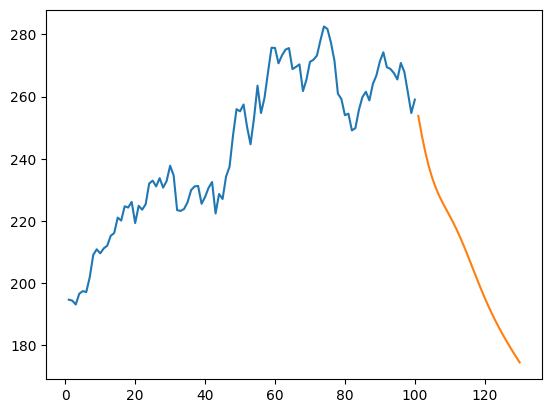

In [30]:
# Assuming df_Price1[1128:] has 100 elements
# Generate days for the original data
day_new = np.arange(1, 101)

# Get the corresponding data points for the original data
original_data = scaler.inverse_transform(df_Price1[1128:1128+len(day_new)])

# Plot original data
plt.plot(day_new, original_data)

# Generate days for the predicted data, starting from the last day of original data + 1
day_pred = np.arange(day_new[-1] + 1, day_new[-1] + 31)  

# Plot predicted data
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

